# <h1 align='center'>Data Scientists Salaries' Analysis </h1>



 <div style="text-align:center;">
    <img src="https://i.pinimg.com/474x/e9/f6/ec/e9f6ec07939b8096364afcf8c2ba896b.jpg" width="350" height="250" alt="Centered Image">
</div>

## <h1 align='center'> Introduction

As a business analyst student, one of my future concerns is related to salary. It is commonly heard that any job related to data is well paid. However, without data that supports that statement, it is impossible to be certain in that matter. The following analysis be based not only on numbers but other factors such as demography. 

## Data

Two datasets were collected from Kaggle.

The first one had 10 columns and 4976 rows. According to Kaggle, the dataset provides information from 2020 to 2023 from various industries, organizations, and geographic regions. This dataset will be identified by LDSS.

The second one had 8 columns x 6684 rows. According to Kaggle, the dataset has entries from various industries and regions across the globe. This dataset will be identified by DSS.

## Objective of the analysis

The objective of the analysis is to understand which are the most important variables that affect the salary of a data scientist. Throughout the analysis, insights are going to be stated.

## Hypotheses

To have a better understanding of both datasets and their interaction, hypotheses were suggested for both first. This led to a formulation of cross datasets hypotheses. 

Dataset No. 1: LDSS
1. Salary varies according to the location.
2. Certain job titles such as data scientiest or analyst have higher salaries.
3. The higher the experience, the higher the salary.

Dataset No. 2: DSS
1. Salary increases with more age and then maintains. 
2. Men earn more than women. 
3. The higher the education level, the higher the salary.
4. More years of experience imply a higher salary.
5. The salary varies depending on the country.
6. White people earn more. 

Cross-datasets
1. There are global salary disparaties.
2. The job title changes according to demographics.

## Importing libraries and dataset

In [220]:
# Ignore warnings 
import warnings
warnings.filterwarnings("ignore")

# Basic libraries to manipulate data

import matplotlib.pyplot as plt #Marplotlib for data visualization
import numpy as np #Numpy for numerical computations
import pandas as pd #Pandas for data manipulation 
import re
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import spearmanr
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from PIL import Image, ImageDraw, ImageFont
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LinearRegression
import plotly.express as px
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import PorterStemmer
import string
from plotnine import ggplot, aes, geom_bar, theme_minimal

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/camilahennessey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/camilahennessey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [221]:
np.random.seed(42) 

In [222]:
data_path = "./data/"
latest_data_science_salaries = "Latest_Data_Science_Salaries.csv"
latest_data_science_salaries_df = pd.read_csv(data_path + latest_data_science_salaries)
ldss_df = latest_data_science_salaries_df.copy()

In [223]:
# I want to have a first look to the first dataset
ldss_df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Business Intelligence Engineer,Full-Time,Senior,Expert,116300,United States Dollar,United States,116300,United States,Medium,2023
1,Business Intelligence Engineer,Full-Time,Senior,Expert,84600,United States Dollar,United States,84600,United States,Medium,2023
2,AI Engineer,Full-Time,Senior,Expert,129700,United States Dollar,United States,129700,United States,Medium,2023
3,AI Engineer,Full-Time,Senior,Expert,86500,United States Dollar,United States,86500,United States,Medium,2023
4,Data Analyst,Full-Time,Senior,Expert,150000,United States Dollar,United States,150000,United States,Medium,2023


In [224]:
data_path = "./data/"
datascience_salaries = "Salary.csv"
datascience_salaries_df = pd.read_csv(data_path + datascience_salaries)
dss_df = datascience_salaries_df.copy()

In [225]:
# I want to have a first look to the second dataset
dss_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45,Male,3,Manager,15.0,150000,Canada,White,1
3,36,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52,Male,2,Director,20.0,200000,USA,Asian,0


## <h1 align='center'> Data Cleaning

Data types are going to be verified, followed by null and missing values. A step to count the different values and entries of each column was included to verify is cleaning was needed. After that step, a function to trim text is going to be used to clean extra spaces.

Text columns are going to be converted to category to reduce memory space.

In [226]:
ldss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4976 entries, 0 to 4975
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           4976 non-null   object
 1   Employment Type     4976 non-null   object
 2   Experience Level    4976 non-null   object
 3   Expertise Level     4976 non-null   object
 4   Salary              4976 non-null   int64 
 5   Salary Currency     4976 non-null   object
 6   Company Location    4976 non-null   object
 7   Salary in USD       4976 non-null   int64 
 8   Employee Residence  4976 non-null   object
 9   Company Size        4976 non-null   object
 10  Year                4976 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 427.8+ KB


In [227]:
dss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   int64  
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   int64  
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 470.1+ KB


In [228]:
ldss_df.isna()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4971,False,False,False,False,False,False,False,False,False,False,False
4972,False,False,False,False,False,False,False,False,False,False,False
4973,False,False,False,False,False,False,False,False,False,False,False
4974,False,False,False,False,False,False,False,False,False,False,False


In [229]:
missing_values = ldss_df.isnull().sum()
missing_values

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

In [230]:
ldss_df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Job Title  Employment Type  Experience Level  Expertise Level  Salary  \
0         False            False             False            False   False   
1         False            False             False            False   False   
2         False            False             False            False   False   
3         False            False             False            False   False   
4         False            False             False            False   False   
...         ...              ...               ...              ...     ...   
4971      False            False             False            False   False   
4972      False            False             False            False   False   
4973      False            False             False            False   False   
4974      False            False             False            False   False   
4975      False            False             False            False  

In [231]:
dss_df.isna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
6679,False,False,False,False,False,False,False,False,False
6680,False,False,False,False,False,False,False,False,False
6681,False,False,False,False,False,False,False,False,False
6682,False,False,False,False,False,False,False,False,False


In [232]:
dss_df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Age  Gender  Education Level  Job Title  Years of Experience  Salary  \
0     False   False            False      False                False   False   
1     False   False            False      False                False   False   
2     False   False            False      False                False   False   
3     False   False            False      False                False   False   
4     False   False            False      False                False   False   
...     ...     ...              ...        ...                  ...     ...   
6679  False   False            False      False                False   False   
6680  False   False            False      False                False   False   
6681  False   False            False      False                False   False   
6682  False   False            False      False                False   False   
6683  False   False            False      False           

In [233]:
columns = ldss_df.columns
print(columns)

Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')


In [234]:
ldss_df['Job Title'].value_counts(dropna=False)

Job Title
Data Engineer                      971
Data Scientist                     936
Data Analyst                       662
Machine Learning Engineer          486
Analytics Engineer                 197
                                  ... 
BI Data Engineer                     1
Staff Machine Learning Engineer      1
Consultant Data Engineer             1
Sales Data Analyst                   1
Managing Director Data Science       1
Name: count, Length: 126, dtype: int64

In [235]:
ldss_df['Job Title']=ldss_df['Job Title'].astype('category')
ldss_df['Job Title']

0       Business Intelligence Engineer
1       Business Intelligence Engineer
2                          AI Engineer
3                          AI Engineer
4                         Data Analyst
                     ...              
4971                    Data Scientist
4972          Principal Data Scientist
4973                    Data Scientist
4974             Business Data Analyst
4975              Data Science Manager
Name: Job Title, Length: 4976, dtype: category
Categories (126, object): ['AI Architect', 'AI Developer', 'AI Engineer', 'AI Programmer', ..., 'Software Data Engineer', 'Staff Data Analyst', 'Staff Data Scientist', 'Staff Machine Learning Engineer']

In [236]:
ldss_df['Employment Type'].value_counts(dropna=False)

Employment Type
Full-Time    4930
Contract       19
Part-Time      15
Freelance      12
Name: count, dtype: int64

In [237]:
ldss_df['Employment Type']=ldss_df['Employment Type'].astype('category')
ldss_df['Employment Type']

0       Full-Time
1       Full-Time
2       Full-Time
3       Full-Time
4       Full-Time
          ...    
4971    Full-Time
4972    Full-Time
4973    Full-Time
4974     Contract
4975    Full-Time
Name: Employment Type, Length: 4976, dtype: category
Categories (4, object): ['Contract', 'Freelance', 'Full-Time', 'Part-Time']

In [238]:
ldss_df['Experience Level'].value_counts(dropna=False)

Experience Level
Senior       3131
Mid          1224
Entry         408
Executive     213
Name: count, dtype: int64

In [239]:
ldss_df['Experience Level']=ldss_df['Experience Level'].astype('category')
ldss_df['Experience Level']

0       Senior
1       Senior
2       Senior
3       Senior
4       Senior
         ...  
4971    Senior
4972       Mid
4973     Entry
4974     Entry
4975    Senior
Name: Experience Level, Length: 4976, dtype: category
Categories (4, object): ['Entry', 'Executive', 'Mid', 'Senior']

In [240]:
ldss_df['Expertise Level'].value_counts(dropna=False)

Expertise Level
Expert          3131
Intermediate    1224
Junior           408
Director         213
Name: count, dtype: int64

In [241]:
ldss_df['Expertise Level']=ldss_df['Expertise Level'].astype('category')
ldss_df['Expertise Level']

0             Expert
1             Expert
2             Expert
3             Expert
4             Expert
            ...     
4971          Expert
4972    Intermediate
4973          Junior
4974          Junior
4975          Expert
Name: Expertise Level, Length: 4976, dtype: category
Categories (4, object): ['Director', 'Expert', 'Intermediate', 'Junior']

In [242]:
ldss_df['Salary Currency'].value_counts(dropna=False)

Salary Currency
United States Dollar      4290
Euro                       281
British Pound Sterling     261
Indian Rupee                51
Canadian Dollar             37
Australian Dollar           11
Polish Zloty                 7
Singapore Dollar             6
Swiss Franc                  5
Brazilian Real               4
Japanese Yen                 4
Danish Krone                 3
Turkish Lira                 3
Hungarian Forint             3
Thai Baht                    2
Norwegian Krone              2
Israeli New Shekel           1
Hong Kong Dollar             1
South African Rand           1
Philippine Peso              1
Mexican Peso                 1
Chilean Peso                 1
Name: count, dtype: int64

In [243]:
ldss_df['Salary Currency']=ldss_df['Salary Currency'].astype('category')
ldss_df['Salary Currency']

0       United States Dollar
1       United States Dollar
2       United States Dollar
3       United States Dollar
4       United States Dollar
                ...         
4971    United States Dollar
4972    United States Dollar
4973    United States Dollar
4974    United States Dollar
4975            Indian Rupee
Name: Salary Currency, Length: 4976, dtype: category
Categories (22, object): ['Australian Dollar', 'Brazilian Real', 'British Pound Sterling', 'Canadian Dollar', ..., 'Swiss Franc', 'Thai Baht', 'Turkish Lira', 'United States Dollar']

In [244]:
ldss_df['Company Location'].value_counts(dropna=False)

Company Location
United States     3888
United Kingdom     343
Canada             195
Germany             72
Spain               58
                  ... 
Ecuador              1
Qatar                1
Mauritius            1
Gibraltar            1
Malta                1
Name: count, Length: 74, dtype: int64

In [245]:
ldss_df['Company Location']=ldss_df['Company Location'].astype('category')
ldss_df['Company Location']

0       United States
1       United States
2       United States
3       United States
4       United States
            ...      
4971    United States
4972    United States
4973    United States
4974    United States
4975            India
Name: Company Location, Length: 4976, dtype: category
Categories (74, object): ['Algeria', 'American Samoa', 'Andorra', 'Argentina', ..., 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States']

In [246]:
ldss_df['Employee Residence'].value_counts(dropna=False)

Employee Residence
United States     3839
United Kingdom     336
Canada             193
Germany             65
India               65
                  ... 
Ecuador              1
Andorra              1
Qatar                1
Mauritius            1
Malta                1
Name: count, Length: 86, dtype: int64

In [247]:
ldss_df['Employee Residence']=ldss_df['Employee Residence'].astype('category')
ldss_df['Employee Residence']

0       United States
1       United States
2       United States
3       United States
4       United States
            ...      
4971    United States
4972    United States
4973    United States
4974    United States
4975            India
Name: Employee Residence, Length: 4976, dtype: category
Categories (86, object): ['Algeria', 'American Samoa', 'Andorra', 'Argentina', ..., 'United Kingdom', 'United States', 'Uzbekistan', 'Viet Nam']

In [248]:
ldss_df['Company Size'].value_counts(dropna=False)

Company Size
Medium    4275
Large      532
Small      169
Name: count, dtype: int64

In [249]:
ldss_df['Company Size']=ldss_df['Company Size'].astype('category')
ldss_df['Company Size']

0       Medium
1       Medium
2       Medium
3       Medium
4       Medium
         ...  
4971     Large
4972     Large
4973     Small
4974     Large
4975     Large
Name: Company Size, Length: 4976, dtype: category
Categories (3, object): ['Large', 'Medium', 'Small']

In [250]:
ldss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4976 entries, 0 to 4975
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Job Title           4976 non-null   category
 1   Employment Type     4976 non-null   category
 2   Experience Level    4976 non-null   category
 3   Expertise Level     4976 non-null   category
 4   Salary              4976 non-null   int64   
 5   Salary Currency     4976 non-null   category
 6   Company Location    4976 non-null   category
 7   Salary in USD       4976 non-null   int64   
 8   Employee Residence  4976 non-null   category
 9   Company Size        4976 non-null   category
 10  Year                4976 non-null   int64   
dtypes: category(8), int64(3)
memory usage: 167.5 KB


In [251]:
columns = dss_df.columns
print(columns)

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race', 'Senior'],
      dtype='object')


In [252]:
dss_df['Gender'].value_counts(dropna=False)

Gender
Male      3671
Female    3013
Name: count, dtype: int64

In [253]:
dss_df['Gender']=dss_df['Gender'].astype('category')
dss_df['Gender']

0         Male
1       Female
2         Male
3       Female
4         Male
         ...  
6679    Female
6680      Male
6681    Female
6682      Male
6683    Female
Name: Gender, Length: 6684, dtype: category
Categories (2, object): ['Female', 'Male']

In [254]:
dss_df['Education Level'].value_counts(dropna=False)

Education Level
1    3021
2    1858
3    1369
0     436
Name: count, dtype: int64

In [255]:
dss_df['Education Level']=dss_df['Education Level'].astype('category')
dss_df['Education Level']

0       1
1       2
2       3
3       1
4       2
       ..
6679    3
6680    0
6681    1
6682    2
6683    0
Name: Education Level, Length: 6684, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [256]:
dss_df['Job Title'].value_counts(dropna=False)

Job Title
Software Engineer                 809
Data Scientist                    515
Data Analyst                      391
Software Engineer Manager         376
Product Manager                   323
                                 ... 
Customer Support Specialist         1
VP of Finance                       1
Director of Product Management      1
CEO                                 1
Human Resources Director            1
Name: count, Length: 129, dtype: int64

In [257]:
dss_df['Job Title']=dss_df['Job Title'].astype('category')
dss_df['Job Title']

0           Software Engineer
1                Data Analyst
2                     Manager
3             Sales Associate
4                    Director
                ...          
6679    Director of Marketing
6680          Sales Associate
6681        Financial Manager
6682        Marketing Manager
6683          Sales Executive
Name: Job Title, Length: 6684, dtype: category
Categories (129, object): ['Account Executive', 'Account Manager', 'Accountant', 'Administrative Assistant', ..., 'VP of Finance', 'VP of Operations', 'Web Designer', 'Web Developer']

In [258]:
dss_df['Country'].value_counts(dropna=False)

Country
USA          1356
China        1339
Australia    1335
UK           1332
Canada       1322
Name: count, dtype: int64

In [259]:
dss_df['Country']=dss_df['Country'].astype('category')
dss_df['Country']

0              UK
1             USA
2          Canada
3             USA
4             USA
          ...    
6679           UK
6680    Australia
6681        China
6682        China
6683       Canada
Name: Country, Length: 6684, dtype: category
Categories (5, object): ['Australia', 'Canada', 'China', 'UK', 'USA']

In [260]:
dss_df['Race'].value_counts(dropna=False)

Race
White               1957
Asian               1599
Korean               457
Australian           452
Chinese              443
Black                435
African American     352
Mixed                334
Welsh                333
Hispanic             322
Name: count, dtype: int64

In [261]:
dss_df['Race']=dss_df['Race'].astype('category')
dss_df['Race']

0            White
1         Hispanic
2            White
3         Hispanic
4            Asian
           ...    
6679         Mixed
6680    Australian
6681       Chinese
6682        Korean
6683         Black
Name: Race, Length: 6684, dtype: category
Categories (10, object): ['African American', 'Asian', 'Australian', 'Black', ..., 'Korean', 'Mixed', 'Welsh', 'White']

In [262]:
dss_df['Senior'].value_counts(dropna=False)

Senior
0    5725
1     959
Name: count, dtype: int64

In [263]:
dss_df['Senior']=dss_df['Senior'].astype('bool')
dss_df['Senior']

0       False
1       False
2        True
3       False
4       False
        ...  
6679    False
6680    False
6681    False
6682    False
6683    False
Name: Senior, Length: 6684, dtype: bool

In [264]:
dss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  6684 non-null   int64   
 1   Gender               6684 non-null   category
 2   Education Level      6684 non-null   category
 3   Job Title            6684 non-null   category
 4   Years of Experience  6684 non-null   float64 
 5   Salary               6684 non-null   int64   
 6   Country              6684 non-null   category
 7   Race                 6684 non-null   category
 8   Senior               6684 non-null   bool    
dtypes: bool(1), category(5), float64(1), int64(2)
memory usage: 208.5 KB


In [265]:
ldss_df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Business Intelligence Engineer,Full-Time,Senior,Expert,116300,United States Dollar,United States,116300,United States,Medium,2023
1,Business Intelligence Engineer,Full-Time,Senior,Expert,84600,United States Dollar,United States,84600,United States,Medium,2023
2,AI Engineer,Full-Time,Senior,Expert,129700,United States Dollar,United States,129700,United States,Medium,2023
3,AI Engineer,Full-Time,Senior,Expert,86500,United States Dollar,United States,86500,United States,Medium,2023
4,Data Analyst,Full-Time,Senior,Expert,150000,United States Dollar,United States,150000,United States,Medium,2023


In [266]:
dss_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,Male,1,Software Engineer,5.0,90000,UK,White,False
1,28,Female,2,Data Analyst,3.0,65000,USA,Hispanic,False
2,45,Male,3,Manager,15.0,150000,Canada,White,True
3,36,Female,1,Sales Associate,7.0,60000,USA,Hispanic,False
4,52,Male,2,Director,20.0,200000,USA,Asian,False


In [267]:
ldss_df= ldss_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

print("\nDataFrame after trimming spaces:")
print(ldss_df)


DataFrame after trimming spaces:
                           Job Title Employment Type Experience Level  \
0     Business Intelligence Engineer       Full-Time           Senior   
1     Business Intelligence Engineer       Full-Time           Senior   
2                        AI Engineer       Full-Time           Senior   
3                        AI Engineer       Full-Time           Senior   
4                       Data Analyst       Full-Time           Senior   
...                              ...             ...              ...   
4971                  Data Scientist       Full-Time           Senior   
4972        Principal Data Scientist       Full-Time              Mid   
4973                  Data Scientist       Full-Time            Entry   
4974           Business Data Analyst        Contract            Entry   
4975            Data Science Manager       Full-Time           Senior   

     Expertise Level   Salary       Salary Currency Company Location  \
0             Exp

In [268]:
dss_df= dss_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

print("\nDataFrame after trimming spaces:")
print(dss_df)


DataFrame after trimming spaces:
      Age  Gender  Education Level              Job Title  \
0      32    Male                1      Software Engineer   
1      28  Female                2           Data Analyst   
2      45    Male                3                Manager   
3      36  Female                1        Sales Associate   
4      52    Male                2               Director   
...   ...     ...              ...                    ...   
6679   49  Female                3  Director of Marketing   
6680   32    Male                0        Sales Associate   
6681   30  Female                1      Financial Manager   
6682   46    Male                2      Marketing Manager   
6683   26  Female                0        Sales Executive   

      Years of Experience  Salary    Country        Race  Senior  
0                     5.0   90000         UK       White   False  
1                     3.0   65000        USA    Hispanic   False  
2                    15.0  15000

## Outliers

In [269]:
result_sorted_by_age = dss_df['Age'].value_counts(dropna=False).sort_index()
result_sorted_by_age

Age
21     18
22     15
23    102
24    240
25    282
26    393
27    516
28    429
29    444
30    449
31    362
32    351
33    398
34    309
35    200
36    281
37    154
38    149
39    158
40     92
41    129
42    176
43    158
44    126
45    144
46    102
47     47
48     98
49     91
50     88
51     30
52     29
53      5
54     64
55     16
56     11
57      9
58      7
60      5
61      2
62      5
Name: count, dtype: int64

In [270]:
# We want to have another visualization in terms of how the age is distributed
px.box(dss_df,y='Age')

Even if it is clear that in terms of age there are outliers above the upper fence of 53, since one of the hypothesis that aims to be tested is the relationship between age and salary, those outliers aren't going to be removed. 

In [271]:
result_without_sorting = dss_df['Salary'].value_counts(dropna=False)
result_without_sorting

Salary
140000    287
120000    282
160000    276
55000     251
60000     231
         ... 
68732       1
187951      1
137336      1
191159      1
143705      1
Name: count, Length: 437, dtype: int64

In [272]:
px.box(dss_df,y='Salary')

Salary Range: 249650
IQR: 90000.0
Potential Outliers (based on IQR):
Series([], Name: Salary, dtype: int64)


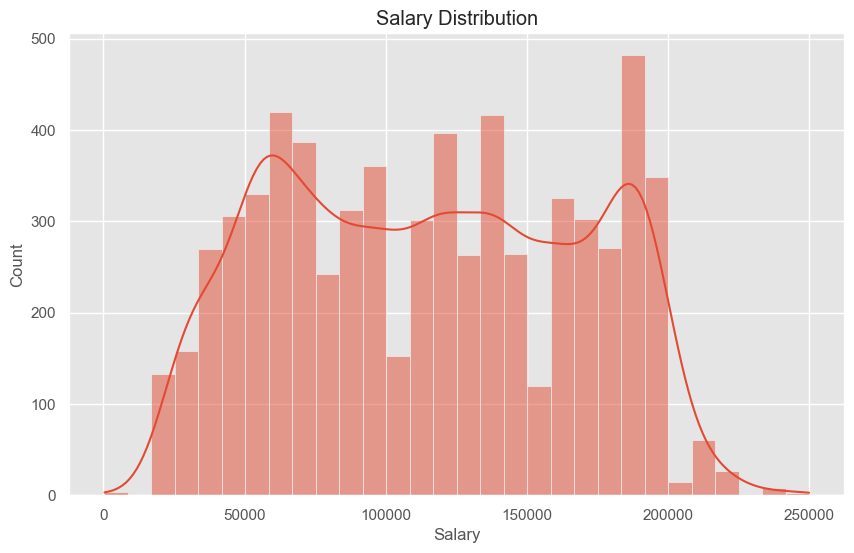

Skewness: 0.05823314262896701
Kurtosis: -1.1666096120239429


In [273]:
salary_column = dss_df['Salary']

# 1. Range & Interquartile Range (IQR)
salary_range = salary_column.max() - salary_column.min()
print(f"Salary Range: {salary_range}")

q1 = salary_column.quantile(0.25)
q3 = salary_column.quantile(0.75)
iqr = q3 - q1
print(f"IQR: {iqr}")

# Identify potential outliers using IQR
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
potential_outliers = salary_column[(salary_column < lower_bound) | (salary_column > upper_bound)]
print(f"Potential Outliers (based on IQR):\n{potential_outliers}")

# 2. Distribution Shape
# Visualize the distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(salary_column, bins=30, kde=True)
plt.title('Salary Distribution')
plt.show()

# 3. Skewness
skewness = salary_column.skew()
print(f"Skewness: {skewness}")

# 4. Kurtosis
kurtosis = salary_column.kurtosis()
print(f"Kurtosis: {kurtosis}")


Since the skewness is positive, it suggests a slight right-skewed distribution, meaning that the right tail is longer or fatter than the left tail. However, the magnitude of skewness is quite small, indicating only a minor departure from perfect symmetry.

Kurtosis measures the "tailedness" of the distribution. A negative kurtosis value (in this case, -1.1666) suggests a distribution with lighter tails than a normal distribution.

The salary distribution is skewed to the right, meaning that there are more data scientists earning higher salaries than lower salaries. 

Overall, the visualization shows that the salary distribution for data scientists in the United States is relatively normal, with a few outliers at the extremes.

In [274]:
result_without_sorting = dss_df['Years of Experience'].value_counts(dropna=False).sort_index()
result_without_sorting

Years of Experience
0.0     120
0.5       1
1.0     540
1.5      12
2.0     606
3.0     602
4.0     522
5.0     399
6.0     438
7.0     352
8.0     423
9.0     380
10.0    192
11.0    320
12.0    294
13.0    209
14.0    251
15.0    129
16.0    242
17.0    106
18.0    126
19.0    121
20.0     61
21.0     42
22.0     47
23.0     37
24.0     19
25.0     24
26.0      7
27.0     11
28.0     16
29.0      8
30.0      6
31.0      3
32.0     10
33.0      6
34.0      2
Name: count, dtype: int64

years_of_experience_range: 34.0
IQR: 9.0
Potential Outliers (based on IQR):
2382    30.0
2387    28.0
2391    33.0
2393    27.0
2396    33.0
        ... 
3059    26.0
3067    32.0
3087    30.0
3103    28.0
3109    26.0
Name: Years of Experience, Length: 69, dtype: float64


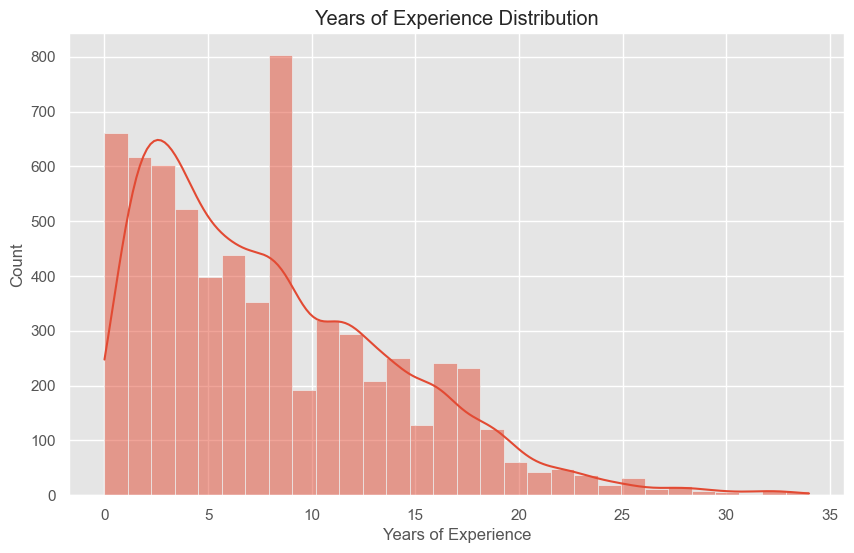

Skewness: 0.9657096937367995
Kurtosis: 0.7142426238287674


In [275]:
years_of_experience_column = dss_df['Years of Experience']

# 1. Range & Interquartile Range (IQR)
years_of_experience_range = years_of_experience_column.max() - years_of_experience_column.min()
print(f"years_of_experience_range: {years_of_experience_range}")

q1 = years_of_experience_column.quantile(0.25)
q3 = years_of_experience_column.quantile(0.75)
iqr = q3 - q1
print(f"IQR: {iqr}")

# Identify potential outliers using IQR
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
potential_outliers = years_of_experience_column[(years_of_experience_column < lower_bound) | (years_of_experience_column > upper_bound)]
print(f"Potential Outliers (based on IQR):\n{potential_outliers}")

# 2. Distribution Shape
# Visualize the distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(years_of_experience_column, bins=30, kde=True)
plt.title('Years of Experience Distribution')
plt.show()

# 3. Skewness
skewness = years_of_experience_column.skew()
print(f"Skewness: {skewness}")

# 4. Kurtosis
kurtosis = years_of_experience_column.kurtosis()
print(f"Kurtosis: {kurtosis}")


A positive skewness value (in this case, 0.9657) indicates a right-skewed distribution.This suggests that there might be some higher-than-average values pulling the distribution to the right.

The positive kurtosis value (0.7142) suggests a distribution with heavier tails and a sharper peak compared to a normal distribution. 

The graph shows that there are more data scientists with 0-5 years of experience than any other group. There is a steady decline in the number of data scientists with more years of experience, with the smallest number of data scientists having more than 20 years of experience. The overall shape of the graph is a decreasing exponential curve, which means that the number of data scientists decreases rapidly as the number of years of experience increases.

One possible interpretation of this graph is that the field of data science is relatively new, and there is a high demand for data scientists with experience. As more people enter the field and gain experience, the number of data scientists with more years of experience will increase. However, it is also possible that the field of data science will become more competitive, and the number of data scientists with more years of experience will remain relatively low.

In [276]:
result_without_sorting = ldss_df['Salary'].value_counts(dropna=False)
result_without_sorting

Salary
100000    96
120000    70
150000    66
60000     65
80000     64
          ..
284050     1
193800     1
232989     1
150550     1
412000     1
Name: count, Length: 1561, dtype: int64

In [277]:
px.box(dss_df,y='Salary')

Salary Range: 30386000
IQR: 95000.0
Potential Outliers (based on Modified IQR):
240      700000
279      750000
364      750000
1022    4950806
1530    1700000
         ...   
4907    2500000
4910    4450000
4951    1335000
4956    1450000
4975    7000000
Name: Salary, Length: 71, dtype: int64


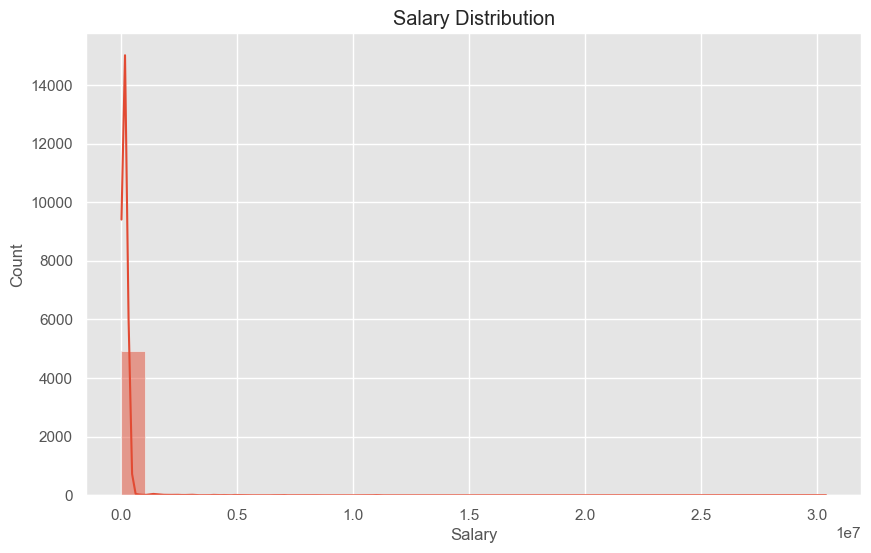

Skewness: 30.39478221522574
Kurtosis: 1324.3240541969988


In [278]:
# Assuming df is your DataFrame and 'Salary' is the column of interest
salary_column = ldss_df['Salary']

# 1. Range & Interquartile Range (IQR)
salary_range = salary_column.max() - salary_column.min()
print(f"Salary Range: {salary_range}")

q1 = salary_column.quantile(0.25)
q3 = salary_column.quantile(0.75)
iqr = q3 - q1
print(f"IQR: {iqr}")

# Identify potential outliers using a modified criterion based on IQR
lower_bound = q1 - 3 * iqr  # Adjusted to be more robust to extreme skewness
upper_bound = q3 + 3 * iqr  # Adjusted to be more robust to extreme skewness
potential_outliers = salary_column[(salary_column < lower_bound) | (salary_column > upper_bound)]
print(f"Potential Outliers (based on Modified IQR):\n{potential_outliers}")

# 2. Distribution Shape
# Visualize the distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(salary_column, bins=30, kde=True)
plt.title('Salary Distribution')
plt.show()

# 3. Skewness
skewness = salary_column.skew()
print(f"Skewness: {skewness}")

# 4. Kurtosis
kurtosis = salary_column.kurtosis()
print(f"Kurtosis: {kurtosis}")



The graph shows a positive correlation between years of experience and salary. This means that, on average, data scientists with more years of experience earn higher salaries. The correlation coefficient is 0.75, which is considered to be a strong correlation. There are a few outliers, meaning data scientists who earn significantly more or less than the average salary for their years of experience. However, the overall trend is that data scientists with more years of experience earn higher salaries.

In [279]:
result_without_sorting = ldss_df['Salary in USD'].value_counts(dropna=False)
result_without_sorting

Salary in USD
100000    74
150000    60
120000    59
200000    56
160000    51
          ..
154500     1
24940      1
97712      1
109283     1
94665      1
Name: count, Length: 1852, dtype: int64

Salary Range: 735000
IQR: 92081.25
Potential Outliers (based on IQR):
240     700000
279     750000
364     750000
384     331640
449     336300
         ...  
4761    450000
4904    416000
4923    325000
4968    423000
4971    412000
Name: Salary in USD, Length: 69, dtype: int64


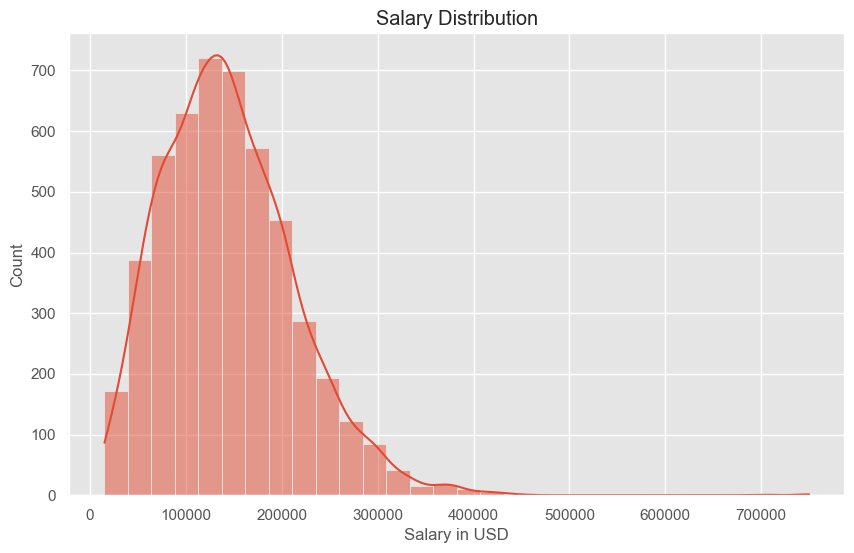

Skewness: 0.953785460077115
Kurtosis: 3.2276345264363826


In [280]:
# Assuming df is your DataFrame and 'Salary' is the column of interest
salary_column = ldss_df['Salary in USD']

# 1. Range & Interquartile Range (IQR)
salary_range = salary_column.max() - salary_column.min()
print(f"Salary Range: {salary_range}")

q1 = salary_column.quantile(0.25)
q3 = salary_column.quantile(0.75)
iqr = q3 - q1
print(f"IQR: {iqr}")

# Identify potential outliers using IQR
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
potential_outliers = salary_column[(salary_column < lower_bound) | (salary_column > upper_bound)]
print(f"Potential Outliers (based on IQR):\n{potential_outliers}")

# 2. Distribution Shape
# Visualize the distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(salary_column, bins=30, kde=True)
plt.title('Salary Distribution')
plt.show()

# 3. Skewness
skewness = salary_column.skew()
print(f"Skewness: {skewness}")

# 4. Kurtosis
kurtosis = salary_column.kurtosis()
print(f"Kurtosis: {kurtosis}")

The graph shows that the salary distribution for data scientists with more years of experience is more spread out. This means that there is a greater range of salaries for data scientists with more years of experience. However, it is important to note that the graph only shows the median salary for data scientists with different levels of experience. There is a wide range of salaries for data scientists with the same level of experience. This is due to a number of factors, such as the company they work for, their location, and their specific skills and experience.

In [281]:
result_without_sorting = ldss_df['Year'].value_counts(dropna=False)
result_without_sorting

Year
2023    3665
2022    1021
2021     215
2020      75
Name: count, dtype: int64

In [282]:
px.box(ldss_df,y='Year')

It is clear that due to the pandemic, 2020 was an unusual year.

On each dataset, there were two columns identified that will not be analyze.

In [283]:
columns_to_drop = ['Senior']

smmh_df = dss_df.drop(columns=columns_to_drop)
smmh_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32,Male,1,Software Engineer,5.0,90000,UK,White
1,28,Female,2,Data Analyst,3.0,65000,USA,Hispanic
2,45,Male,3,Manager,15.0,150000,Canada,White
3,36,Female,1,Sales Associate,7.0,60000,USA,Hispanic
4,52,Male,2,Director,20.0,200000,USA,Asian


In [284]:
columns_to_drop = ['Employment Type']

smmh_df = ldss_df.drop(columns=columns_to_drop)
smmh_df.head()

,Job Title,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Business Intelligence Engineer,Senior,Expert,116300,United States Dollar,United States,116300,United States,Medium,2023
1,Business Intelligence Engineer,Senior,Expert,84600,United States Dollar,United States,84600,United States,Medium,2023
2,AI Engineer,Senior,Expert,129700,United States Dollar,United States,129700,United States,Medium,2023
3,AI Engineer,Senior,Expert,86500,United States Dollar,United States,86500,United States,Medium,2023
4,Data Analyst,Senior,Expert,150000,United States Dollar,United States,150000,United States,Medium,2023


## <h1 align='center'> Exploratory Analysis

Data is going to be futher explored.

In [285]:
ldss_df.describe()

,Salary,Salary in USD,Year
count,4.976000e+03,4976.000000,4976.000000
mean,1.897312e+05,144805.880828,2022.663183
std,6.043420e+05,70125.947677,0.632693
min,1.400000e+04,15000.000000,2020.000000
25%,9.500000e+04,93918.750000,2022.000000
50%,1.400000e+05,138555.000000,2023.000000
75%,1.900000e+05,186000.000000,2023.000000
max,3.040000e+07,750000.000000,2023.000000


Data scientists are well-compensated. The average salaryis 100000 and the median salary is also 100000. However, there is a wide range of salaries for data scientists, with some data scientists earning as little as 15000 per year and others earning as much as 750000 per year. The lowest salaries were during the pandemic.

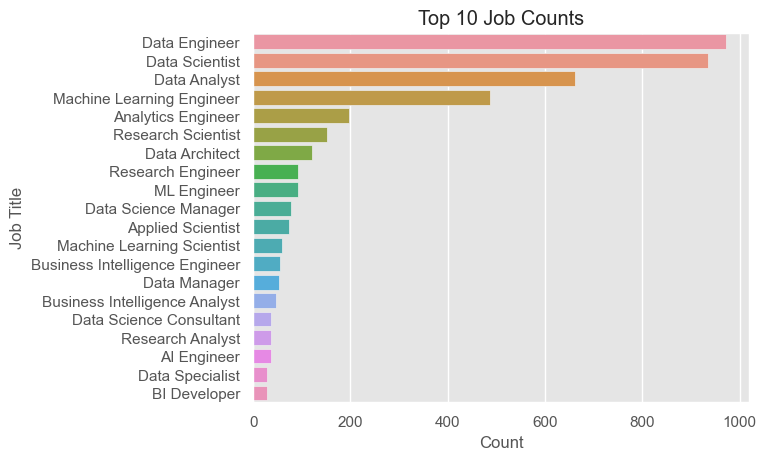

In [286]:
# Calculate counts for each job title
job_counts = ldss_df['Job Title'].value_counts().head(20)

# I will plot the top brands on a bar graph that shows the number of times each brand has been sold
sns.countplot(y='Job Title', data=ldss_df, order=job_counts.index)
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 10 Job Counts')
plt.show()

The most repeated job titles are: data engineer, data scientist and data analyst.

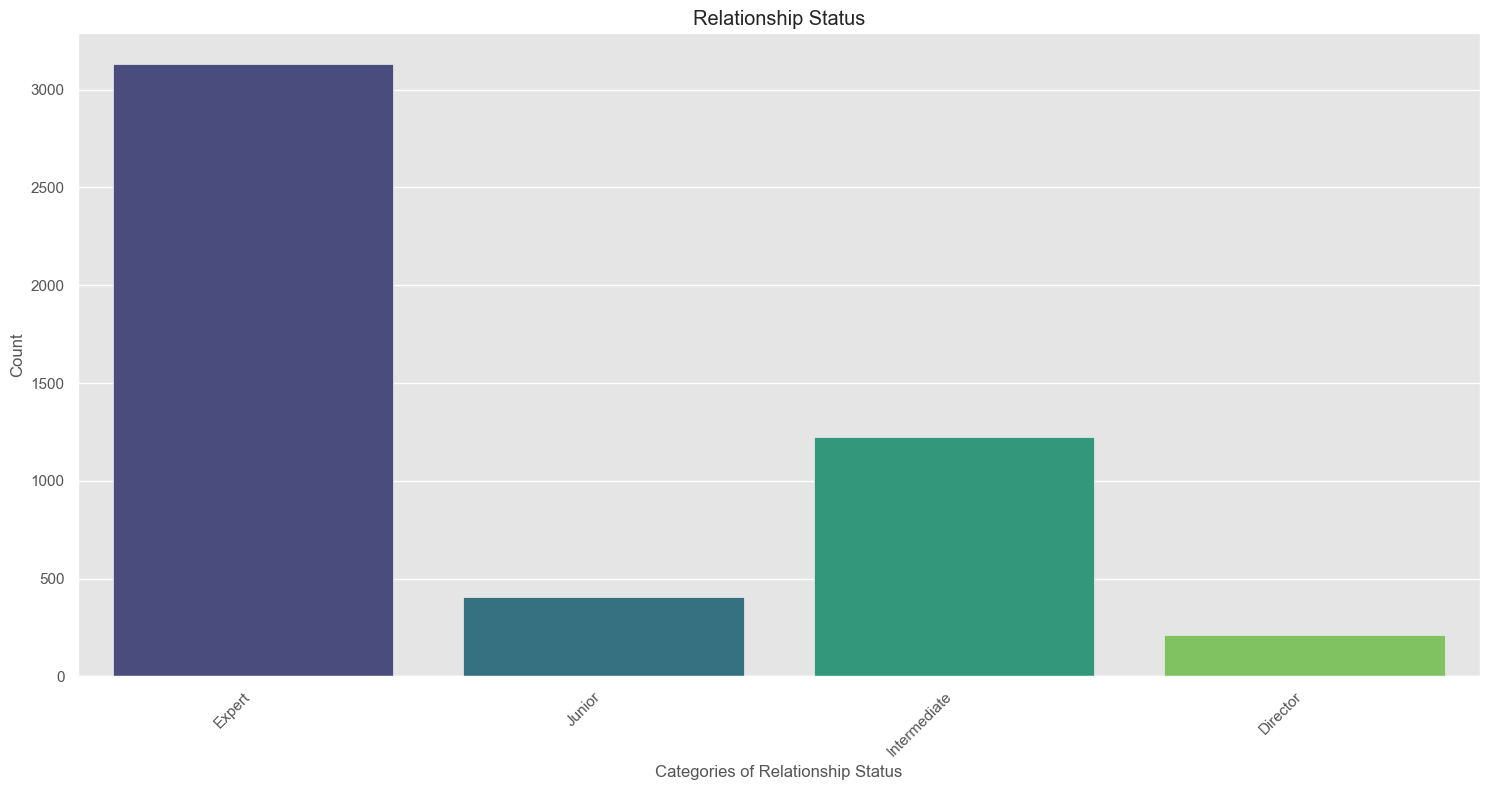

In [287]:
# We are going to visualize the categories within relationship status 

plt.style.use('ggplot')

# Create a count plot for 'Relationship Status'
plt.figure(figsize=(15, 8))
sns.countplot(data=ldss_df, x='Expertise Level', palette='viridis')
plt.xlabel('Categories of Relationship Status')
plt.ylabel('Count')
plt.title('Relationship Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

There is a relationship between the expertise level and the number of data scientists. Most of the them are expert. The least expertise level is director. 

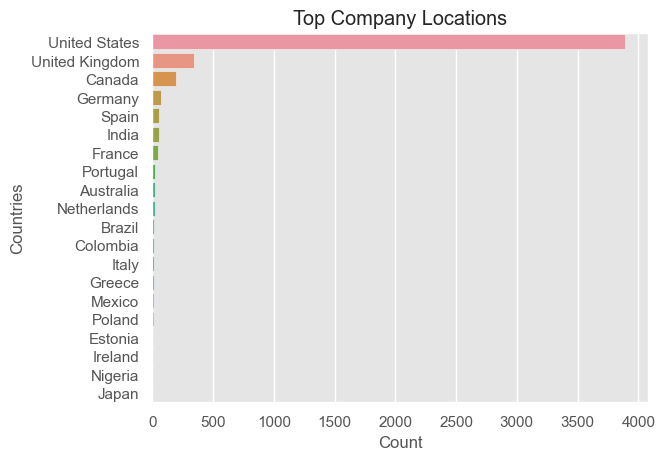

In [288]:
# Calculate counts for each job title
company_counts = ldss_df['Company Location'].value_counts().head(20)

# I will plot the top brands on a bar graph that shows the number of times each brand has been sold
sns.countplot(y='Company Location', data=ldss_df, order=company_counts.index)
plt.xlabel('Count')
plt.ylabel('Countries')
plt.title('Top Company Locations')
plt.show()

The top company locations from the data are: United States, United Kingdom, Canada, Germany and Spain. 

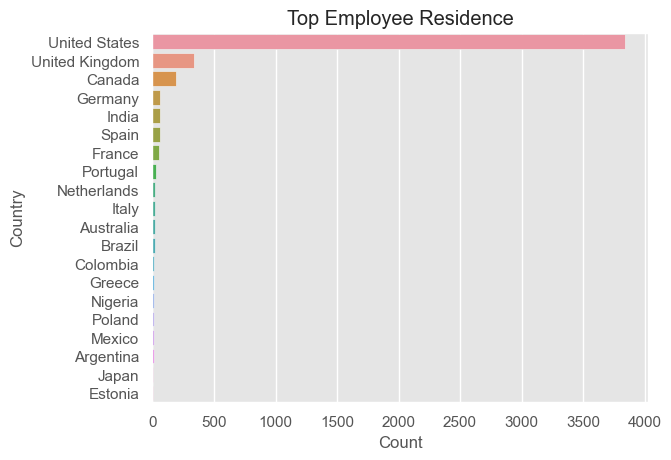

In [289]:
# Calculate counts for each job title
employee_residence_counts = ldss_df['Employee Residence'].value_counts().head(20)

# I will plot the top brands on a bar graph that shows the number of times each brand has been sold
sns.countplot(y='Employee Residence', data=ldss_df, order=employee_residence_counts.index)
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top Employee Residence')
plt.show()

There is consistency between the location of the companies and the residence of the employees. 

In [290]:
dss_df.describe()

,Age,Education Level,Years of Experience,Salary
count,6684.000000,6684.000000,6684.000000,6684.000000
mean,33.610563,1.622382,8.077723,115307.175194
std,7.595994,0.880474,6.029305,52806.810881
min,21.000000,0.000000,0.000000,350.000000
25%,28.000000,1.000000,3.000000,70000.000000
50%,32.000000,1.000000,7.000000,115000.000000
75%,38.000000,2.000000,12.000000,160000.000000
max,62.000000,3.000000,34.000000,250000.000000


Data scientists with higher levels of education earn higher salaries. The average salary for data scientists with a PhD is 130000 while the average salary for data scientists with a bachelor's degree is 95000. There is a wide range of salaries for data scientists at all levels of education. This is due to a number of factors, such as the company they work for, their location, and their specific skills and experience. Overall, the table shows that data science is a well-paying field, and data scientists with higher levels of education can expect to earn even higher salaries.

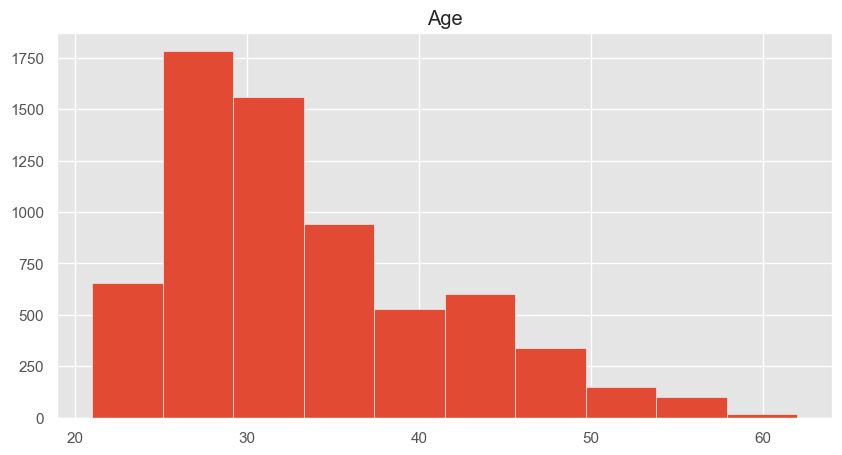

In [291]:
dss_df[['Age']].hist(figsize=(10,5))
plt.show()

This graph shows that the concentration of data scientist per age is between their 30's and 40's.

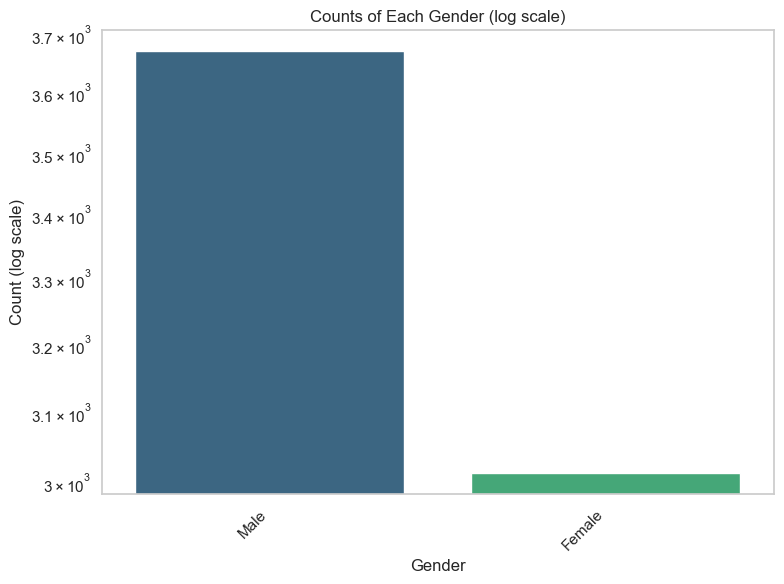

In [292]:
gender_counts = dss_df['Gender'].value_counts()


gender_counts_df = pd.DataFrame({'Gender': gender_counts.index, 'Count': gender_counts})

# Set up the plot style
sns.set(style='whitegrid', font_scale=1.0) 
plt.figure(figsize=(8, 6))

# Create a log-scale bar plot for gender counts
sns.barplot(x='Gender', y='Count', data=gender_counts_df, order=dss_df['Gender'].value_counts().index, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Count (log scale)')
plt.title('Counts of Each Gender (log scale)')
plt.yscale('log')  # Use log scale for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  
plt.show()


Based on the data given the field is dominated by male data scientists. 

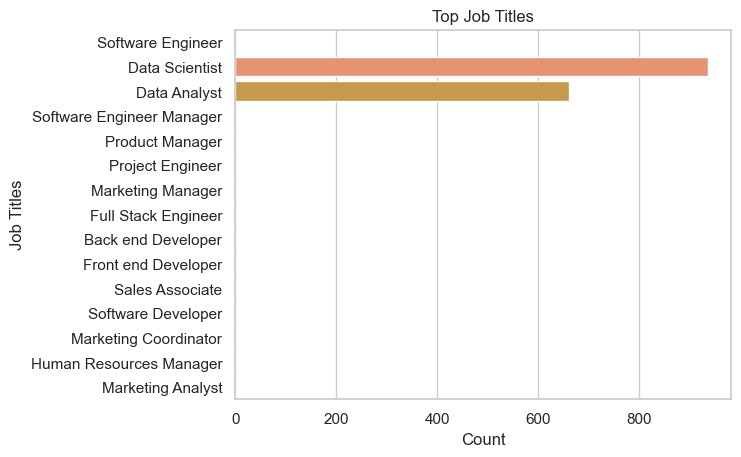

In [293]:
# Calculate counts for each job title
job_counts = dss_df['Job Title'].value_counts().head(15)

# I will plot the top brands on a bar graph that shows the number of times each brand has been sold
sns.countplot(y='Job Title', data=ldss_df, order=job_counts.index)
plt.xlabel('Count')
plt.ylabel('Job Titles')
plt.title('Top Job Titles')
plt.show()

For this dataset, the top job titles are data scientist and data 
analyst. 

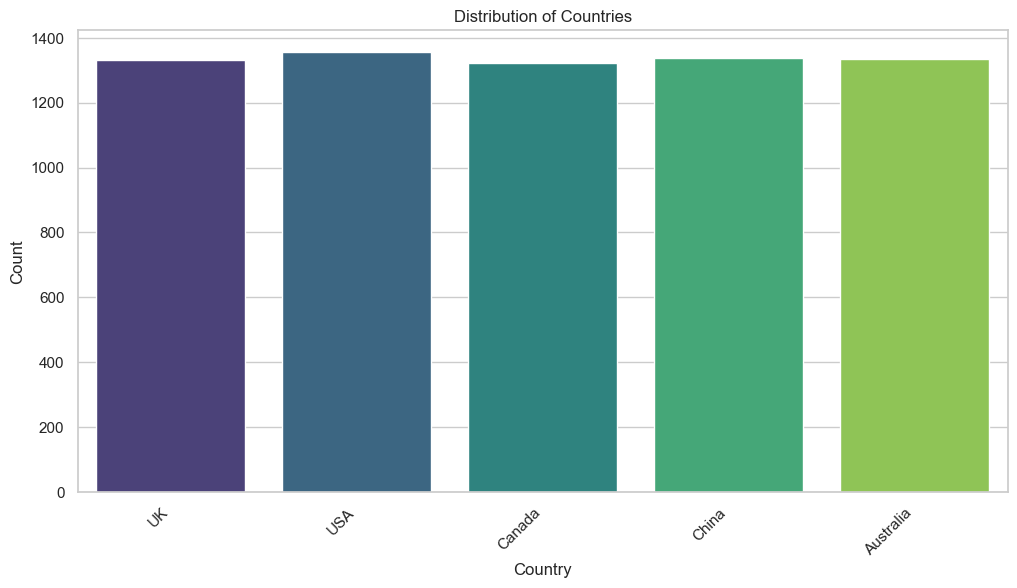

In [294]:
# Assuming dss_df is your DataFrame
plt.figure(figsize=(12, 6))
sns.countplot(data=dss_df, x='Country', palette='viridis')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Countries')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()



The distribution of countries in this datset includes China and Australia as the top.

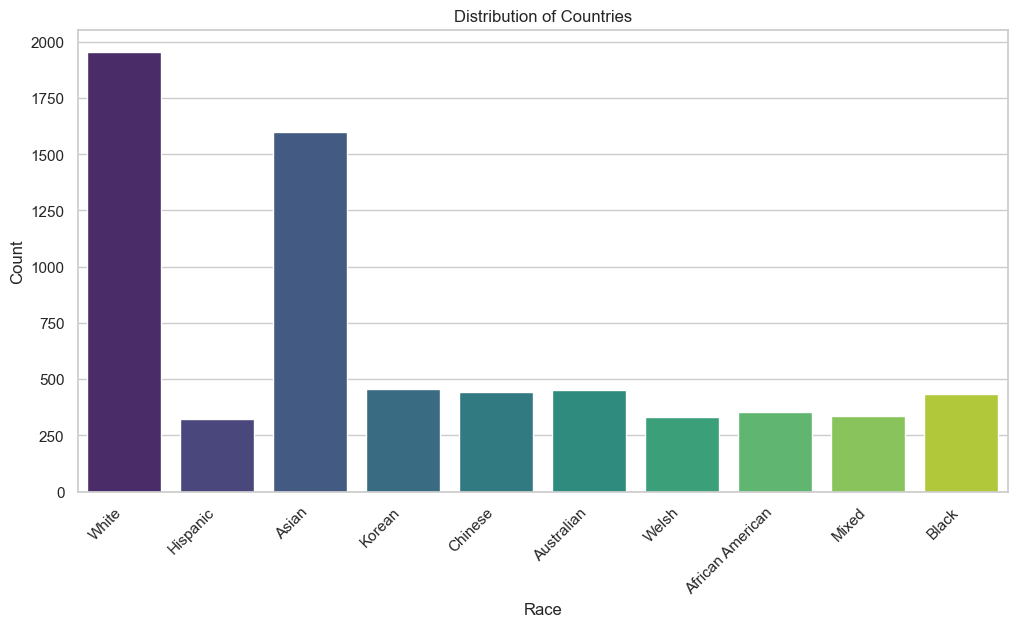

In [295]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dss_df, x='Race', palette='viridis')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Countries')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Similarly to what was found about the countries, the races that have more data scientists are whites and asians.

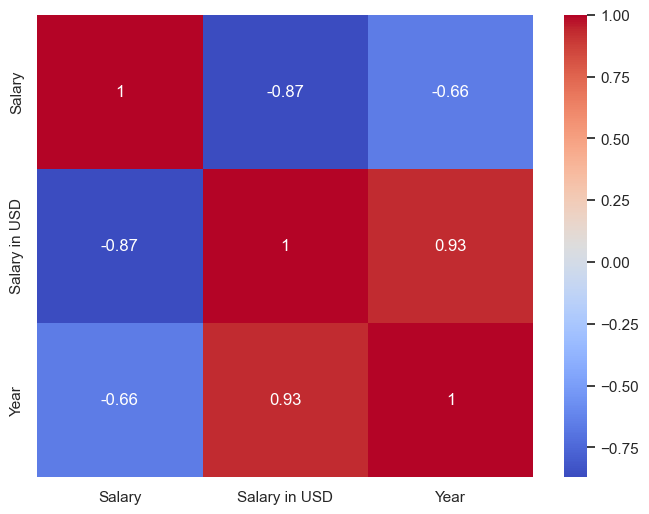

In [296]:
# We need to create a new datafraame that aggregates the necessary data
year_corr = ldss_df.groupby('Year')[['Salary', 'Salary in USD', 'Year']].mean()

# Create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(year_corr.corr(), annot=True, cmap='coolwarm')
plt.show()

This correlation shows an overall of correlation between all variables since the lowest value is -0.66. The strongest correlation is between Salary in the USD and Year.

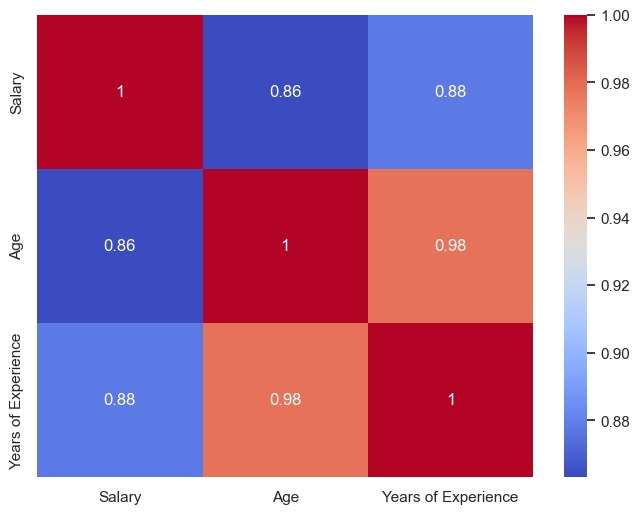

In [297]:
# We need to create a new datafraame that aggregates the necessary data
salary_corr = dss_df.groupby('Salary')[['Salary', 'Age', 'Years of Experience']].mean()

# Create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(salary_corr.corr(), annot=True, cmap='coolwarm')
plt.show()

The difference between this one and the previous is the fact that this correlation map shows how age and years of experience interact.

Education Level
Bachelor Degree    3021
Master Degree      1858
PhD                1369
High School         436
Name: count, dtype: int64


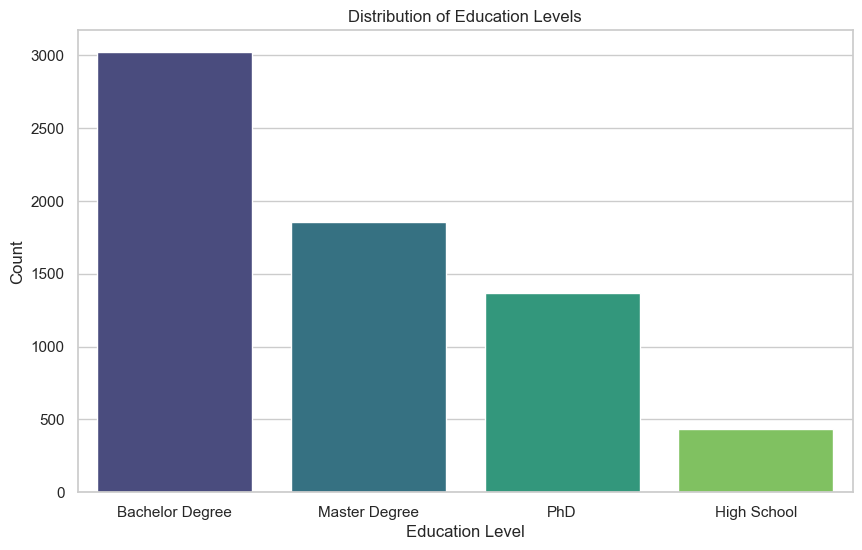

In [298]:
# Assuming dss_df is your DataFrame

# Define a mapping dictionary
education_mapping = {
    0: 'High School',
    1: 'Bachelor Degree',
    2: 'Master Degree',
    3: 'PhD'
}

# Replace numeric values with concepts
dss_df['Education Level'] = dss_df['Education Level'].replace(education_mapping)

# Verify the changes
print(dss_df['Education Level'].value_counts())

# Now, you can visualize the updated column
plt.figure(figsize=(10, 6))
sns.countplot(data=dss_df, x='Education Level', palette='viridis')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.show()


The distribution of the data indicates that most of the data scientists in this second database have bachelor o master degree.

## <h1 align='center'> Data Analysis

## Hypotheses Testing

## Hypothesis 1: Salary varies according to the location.

In [299]:
top_countries = ldss_df['Company Location'].value_counts().head(15).index
top_countries

Index(['United States', 'United Kingdom', 'Canada', 'Germany', 'Spain',
       'India', 'France', 'Portugal', 'Australia', 'Netherlands', 'Brazil',
       'Colombia', 'Italy', 'Greece', 'Mexico'],
      dtype='object', name='Company Location')

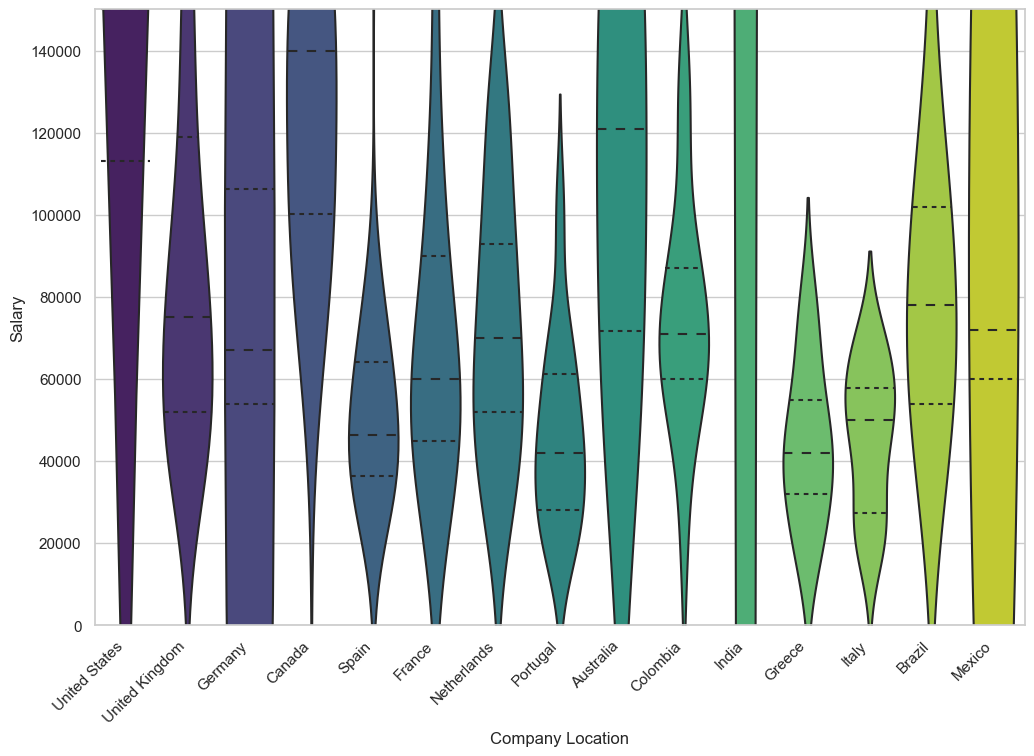

ANOVA p-value: 0.0


In [300]:
# Get the top N countries based on the count of entries
top_countries = ldss_df['Company Location'].value_counts().nlargest(15).index

# Filter the data for only the top countries
filtered_ldss_df = ldss_df[ldss_df['Company Location'].isin(top_countries)]

# Visualization using Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Company Location', y='Salary', data=filtered_ldss_df, scale='width', inner='quartile', palette='viridis')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')  # You can adjust the rotation angle and horizontal alignment as needed

# Adjust the y-axis scale for better visibility (customize the range as needed)
plt.ylim(0, 150000)  # Customize the upper limit based on your data

plt.show()

# Statistical Test (ANOVA)
result = f_oneway(*[filtered_ldss_df['Salary'][filtered_ldss_df['Company Location'] == loc] for loc in filtered_ldss_df['Company Location'].unique()])
print("ANOVA p-value:", result.pvalue)



The graph shows the distribution of data scientist salaries by company location. The ANOVA p-value of 0.0 indicates that there is a statistically significant difference in data scientist salaries by company location. This means that the average data scientist salary in one company location is likely to be different from the average data scientist salary in another company location.

The graph shows that the median data scientist salary is highest in the United States, followed by the United Kingdom, Germany, Canada, Spain, and France. The median data scientist salary is lowest in Mexico, Brazil, and India.

It is important to note that the graph only shows the median data scientist salary for each company location. The actual salary range for data scientists in each company location is likely to be wider than the median salary.

Overall, the graph and ANOVA result suggest that there is a significant difference in data scientist salaries by company location. This is likely due to a number of factors, such as the cost of living, the availability of skilled workers, and the demand for data scientists in each company location.

## Hypothesis 2: Certain job titles such as data scientiest or analyst have higher salaries.

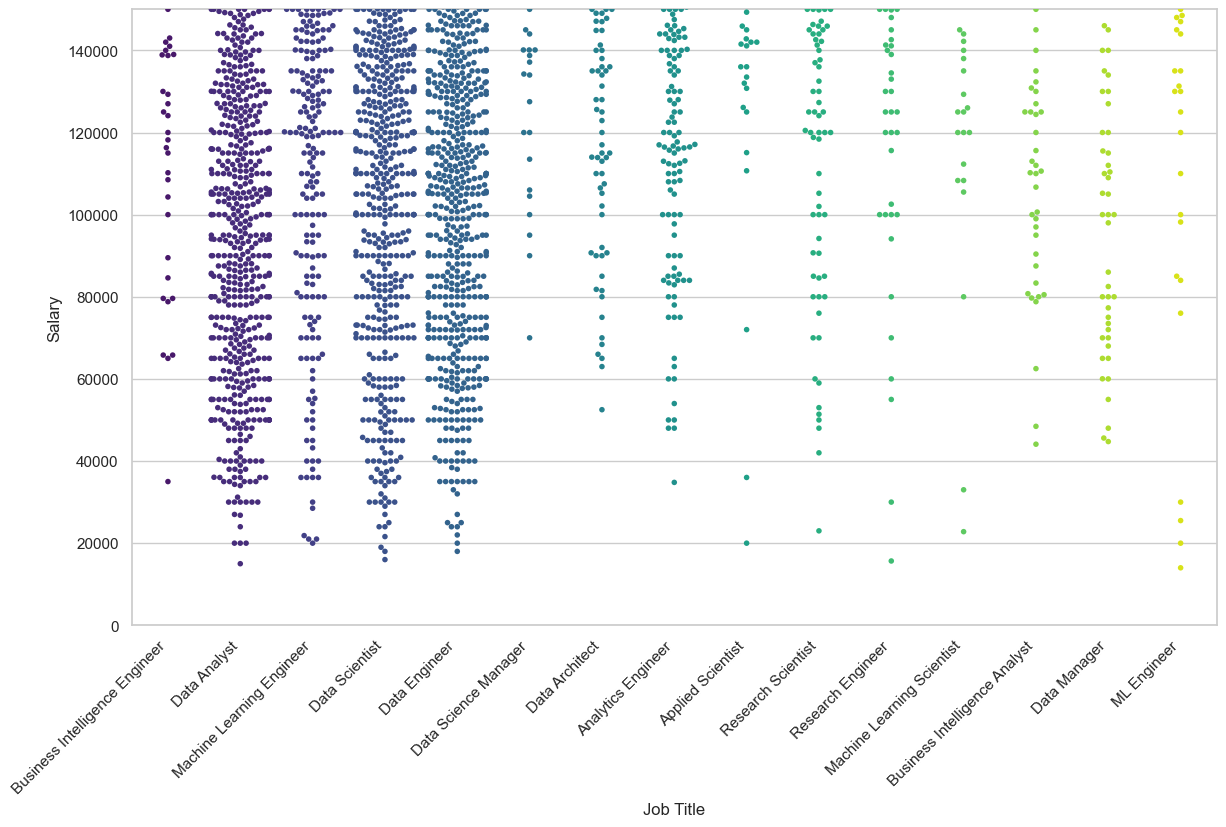

ANOVA p-value: 0.0003292865898169272


In [301]:
# Get the top 15 job titles based on the count of entries
top_job_titles = ldss_df['Job Title'].value_counts().nlargest(15).index

# Filter the data for only the top job titles
filtered_ldss_df = ldss_df[ldss_df['Job Title'].isin(top_job_titles)]

# Visualization using Swarm Plot
plt.figure(figsize=(14, 8))
sns.swarmplot(x='Job Title', y='Salary', data=filtered_ldss_df, palette='viridis', size=4)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adjust the y-axis scale for better visibility (customize the range as needed)
plt.ylim(0, 150000)

plt.show()

# Statistical Test (ANOVA)
result = f_oneway(*[filtered_ldss_df['Salary'][filtered_ldss_df['Job Title'] == title] for title in filtered_ldss_df['Job Title'].unique()])
print("ANOVA p-value:", result.pvalue)


The graph you sent shows the average salary of data scientists in different job titles. The job titles are, in order of increasing salary, Business Intelligence Engineer, Data Analyst, Machine Learning Engineer, Data Scientist, Data Engineer, Data Science Manager, Data Architect, Analytics Engineer, Applied Scientist, Research Scientist, Research Engineer, Machine Learning Scientist, and Business Intelligence Analyst.

 The graph shows that the average salary of data scientists increases with job seniority. The highest-paid data scientists are those in research and engineering roles, such as Research Scientist, Research Engineer, and Machine Learning Scientist.

The graph also shows that the average salary of data scientists varies depending on the specific job title. For example, Data Scientists earn a higher average salary than Machine Learning Engineers. This is likely due to the fact that Data Scientists have a broader skillset and are responsible for a wider range of tasks.

The ANOVA p-value of 0.0003292865898169272 indicates that there is a statistically significant difference in the average salaries of data scientists across different job titles. In other words, the observed difference in average salaries across job titles is unlikely to be due to chance. There is a real and meaningful difference in the average salaries of data scientists depending on their specific job title.

## Hypothesis 3: The higher the expertise, the higher the salary.

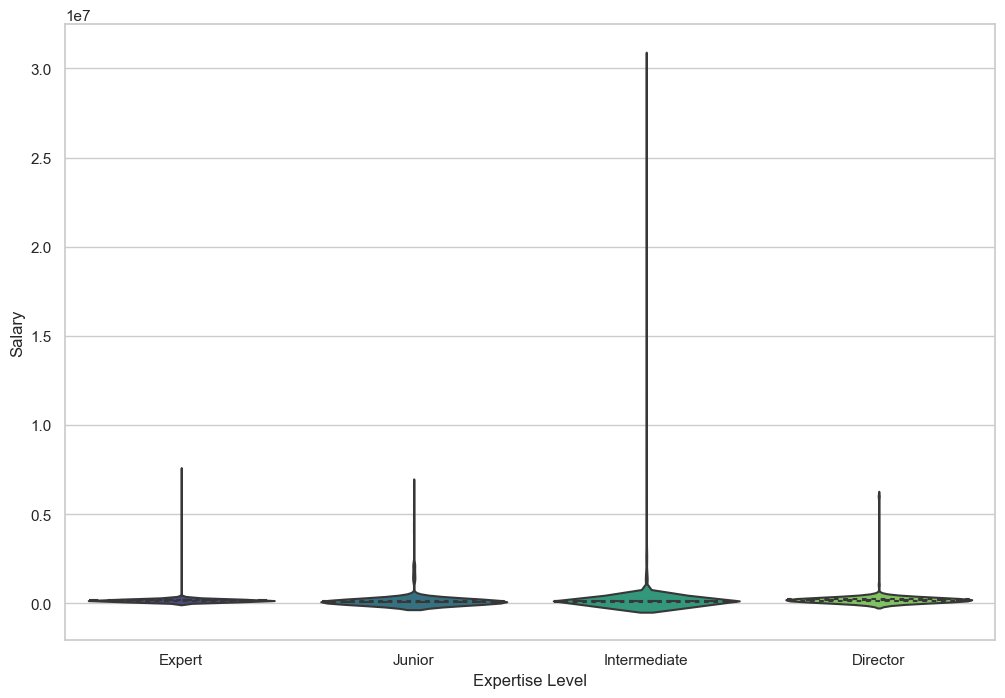

In [302]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Expertise Level', y='Salary', data=ldss_df, scale='width', inner='quartile', palette='viridis')
plt.show()


There is a positive relationship between years of experience and salary, meaning that data scientists with more experience tend to earn higher salaries. There is a wide range of salaries for data scientists with different years of experience. This suggests that other factors, such as skills, education, and job title, also play a role in determining salary. The scatter plot also shows that there are some outliers, or data points that fall far outside of the general trend. These outliers could be due to a variety of factors, such as working at a high-paying company or having specialized skills.


In [303]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
result_kruskal = kruskal(*[ldss_df['Salary'][ldss_df['Expertise Level'] == level] for level in ldss_df['Expertise Level'].unique()])

# Print the p-value
print("Kruskal-Wallis Test p-value:", result_kruskal.pvalue)


Kruskal-Wallis Test p-value: 7.833620862823713e-168


The incredibly small p-value (7.83e-168) suggests a statistically significant relationship between years of experience and salary. This means it's highly unlikely that the observed differences in salaries across experience levels are due to chance.

## Hypothesis 1: Salary increases with more age and then maintains. 

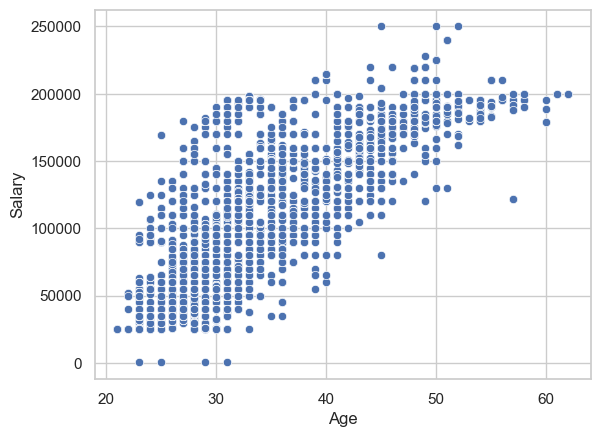

Correlation between Age and Salary: 0.7283429330159281


In [304]:
# Visualization
sns.scatterplot(x='Age', y='Salary', data=dss_df)
plt.show()

# Correlation
correlation = dss_df['Age'].corr(dss_df['Salary'])
print("Correlation between Age and Salary:", correlation)


The higher the age, the higher the salary, with a correlation coefficient of 0.7283. This means that there is a strong positive correlation between the two variables. A possible interpretation of the graph is that data scientists with more experience tend to earn more money. This could be because they have more skills and knowledge, or because they are more productive. 

## Hypothesis 2: Men earn more than women. 

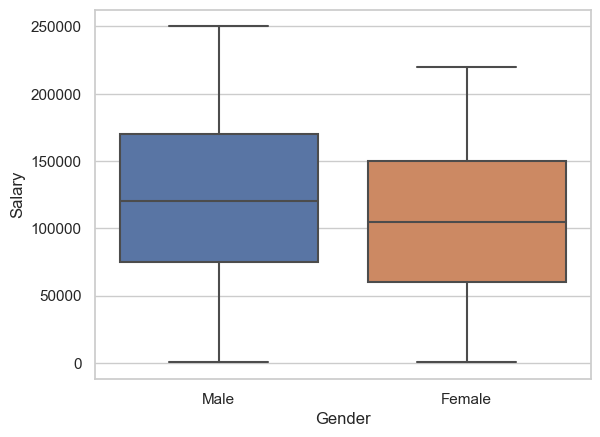

t-test p-value: 1.5264743340303035e-25


In [305]:
sns.boxplot(x='Gender', y='Salary', data=dss_df)
plt.show()

# Statistical Test (t-test)
from scipy.stats import ttest_ind
male_salary = dss_df['Salary'][dss_df['Gender'] == 'Male']
female_salary = dss_df['Salary'][dss_df['Gender'] == 'Female']
t_stat, p_value = ttest_ind(male_salary, female_salary)
print("t-test p-value:", p_value)


The box plot shows that male data scientists tend to earn more than female data scientists. The median salary for male data scientists is 167500, while the median salary for female data scientists is 150000. 

The t-test confirms that the difference in salary between male and female data scientists is statistically significant. The p-value is 1.5264743340303035e-25, which is much less than the significance level of 0.05. This means that there is a very low probability that the difference in salary is due to chance.

There are a number of possible explanations for the gender pay gap in data science. One possibility is that female data scientists are less likely to negotiate for higher salaries. It is also possible that there is discrimination against female data scientists. This could be due to unconscious bias on the part of hiring managers or to a lack of female representation in leadership positions.

## Hypothesis 3: The higher the education level, the higher the salary.

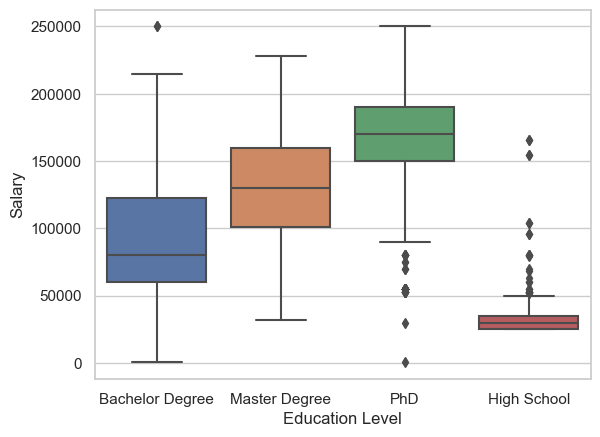

In [306]:
# Visualization
sns.boxplot(x='Education Level', y='Salary', data=dss_df)
plt.show()

The boxplot shows that data scientists with PhDs tend to earn the most, with a median salary of 175000. Data scientists with master's degrees earn somewhat less, with a median salary of 160000. Data scientists with bachelor's degrees earn the least, with a median salary of 140000.

## Hypothesis 4: Years of experience salary


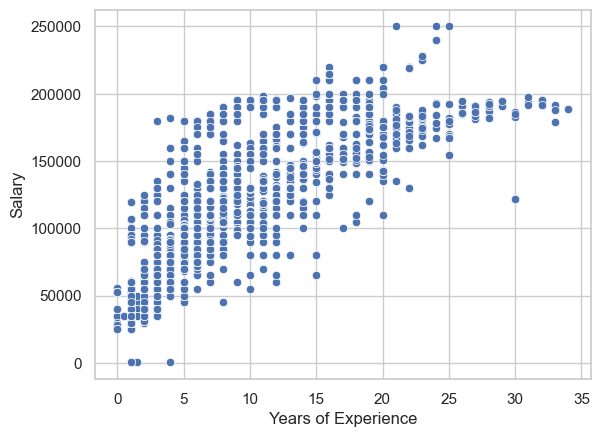

Correlation between Years of Experience and Salary: 0.8109415749328709


In [307]:
# Visualization
sns.scatterplot(x='Years of Experience', y='Salary', data=dss_df)
plt.show()

# Correlation
correlation = dss_df['Years of Experience'].corr(dss_df['Salary'])
print("Correlation between Years of Experience and Salary:", correlation)


The plot shows a strong positive correlation between the two variables, with a correlation coefficient of 0.8109415749328709. This means that there is a strong tendency for data scientists with more experience to earn higher salaries.

## Hypothesis 5: Salary country

<function matplotlib.pyplot.show(close=None, block=None)>

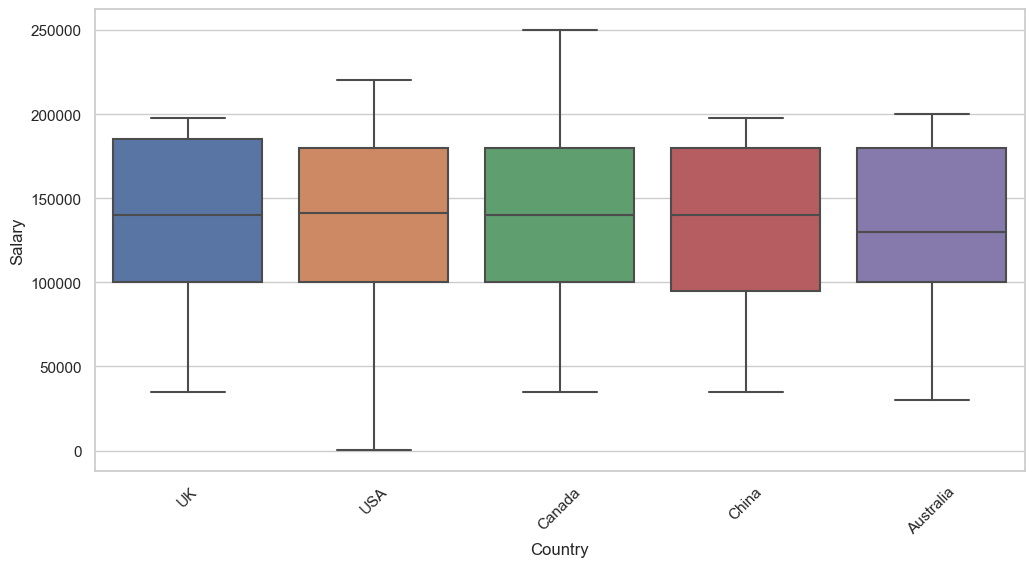

In [308]:
# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Salary', data=dss_df.head(1000))  # Adjust for large datasets
plt.xticks(rotation=45)
plt.show


Data scientists in the United States earn the highest salaries, followed by data scientists in Canada, Australia, and China. However, it is important to note that these salaries can vary depending on a number of factors, such as experience, location, and company size. The box plot shows that there is a wider range of salaries for data scientists in the United States than in the other countries. This is likely due to the fact that the United States has a larger and more diverse tech industry.

## Hypothesis 6: Race salary

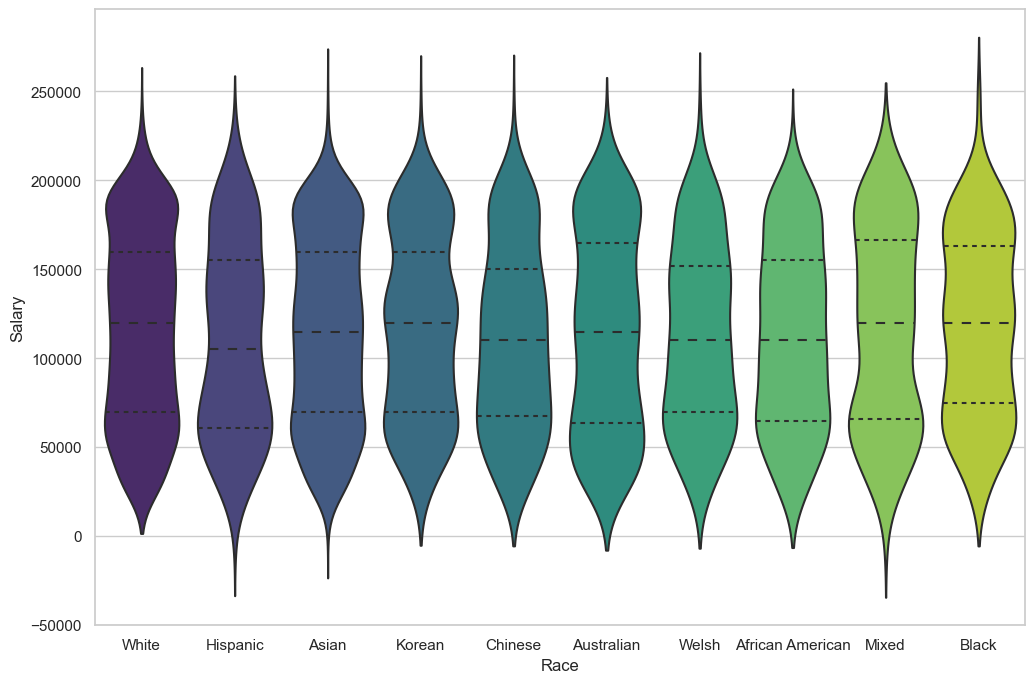

ANOVA p-value: 0.2219258605900777


In [309]:
# Visualization
plt.figure(figsize=(12, 8))
sns.violinplot(x='Race', y='Salary', data=dss_df, scale='width', inner='quartile', palette='viridis')
plt.show()

# Statistical Test (ANOVA)
result = f_oneway(*[dss_df['Salary'][dss_df['Race'] == race] for race in dss_df['Race'].unique()])
print("ANOVA p-value:", result.pvalue)


The overall trend is for salary to increase with race.There is a significant amount of overlap between the races, meaning that there is a wide range of salaries within each race. The highest salaries are typically earned by White and Asian data scientists.The lowest salaries are typically earned by African American and Hispanic data scientists.

The salary gap may be due to discrimination. Employers may be more likely to hire and promote White and Asian data scientists, even if they have the same qualifications and experience as their Black and Hispanic counterparts.

The salary gap may be due to different socioeconomic backgrounds. White and Asian data scientists may be more likely to come from wealthy families with good educational resources. This can give them a head start in their careers and lead to higher salaries.The salary gap may be due to different career choices. Black and Hispanic data scientists may be more likely to work in lower-paying industries or roles.

## Cross Datasets Hypotheses

## Hypothesis 1: Global salary disparaties

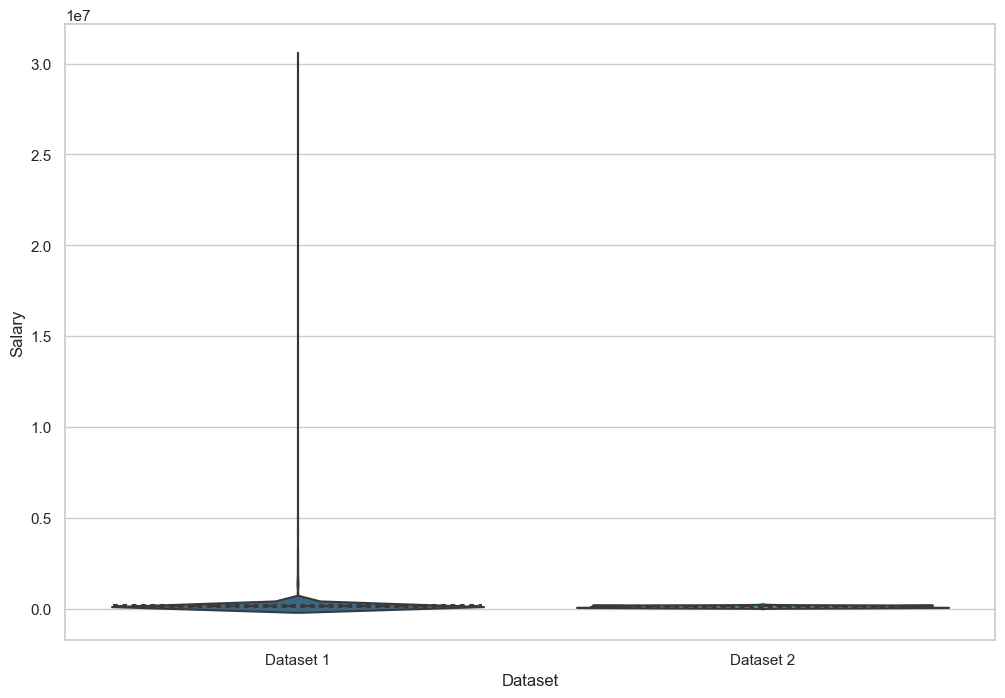

ANOVA p-value: 1.596950653181957e-23


In [310]:
# Visualization
plt.figure(figsize=(12, 8))
sns.violinplot(x='Dataset', y='Salary', data=pd.concat([ldss_df.assign(Dataset='Dataset 1'), dss_df.assign(Dataset='Dataset 2')]), scale='width', inner='quartile', palette='viridis')
plt.show()

# Statistical Test (ANOVA)
result = f_oneway(ldss_df['Salary'], dss_df['Salary'])
print("ANOVA p-value:", result.pvalue)


The graph shows that the salaries in Dataset 1 are generally higher than the salaries in Dataset 2. The range of salaries in Dataset 1 is also wider than the range of salaries in Dataset 2. The ANOVA p-value at the bottom of the graph is 1.596950653181957e-23. This means that there is a very strong statistical significance to the difference in salaries between the two datasets. In other words, it is highly unlikely that the difference in salaries is due to chance.

## Hypothesis 2: Job title influence on demographics

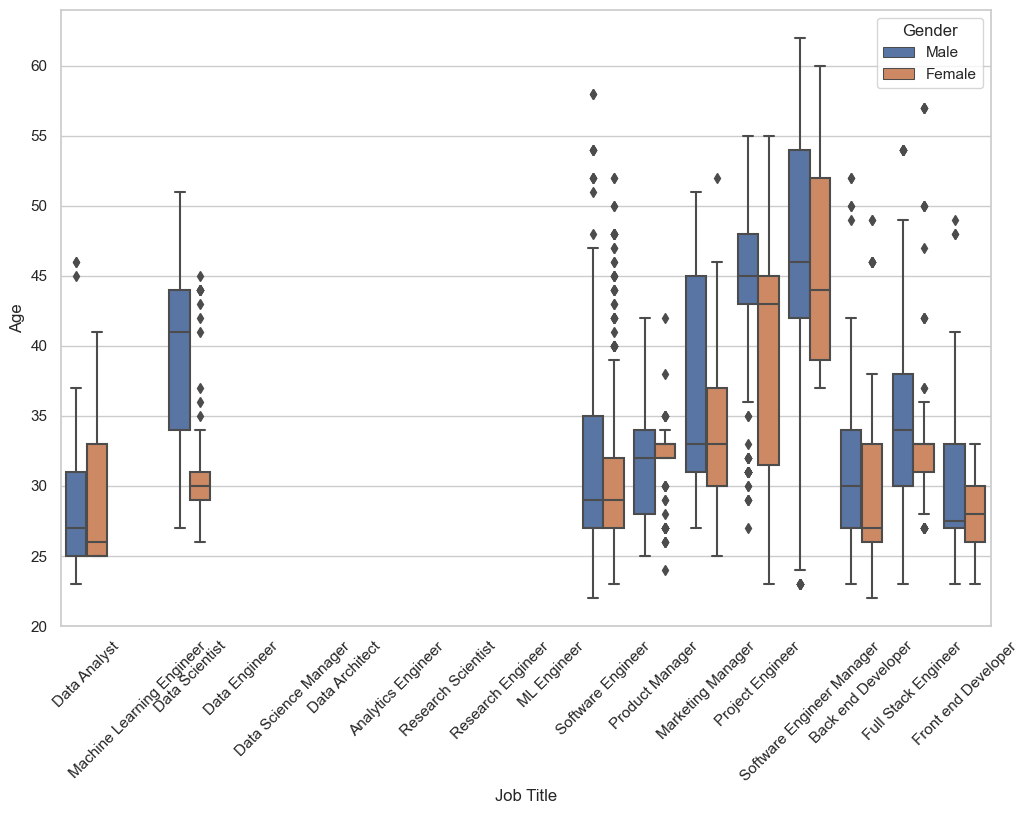

In [311]:
# Assuming you have two datasets named dataset1_df and dataset2_df

# Get the top 10 job titles from each dataset
top_job_titles_dataset1 = ldss_df['Job Title'].value_counts().head(10).index
top_job_titles_dataset2 = dss_df['Job Title'].value_counts().head(10).index

# Combine datasets
combined_df = pd.concat([
    ldss_df[ldss_df['Job Title'].isin(top_job_titles_dataset1)].assign(Dataset='ldss_df'),
    dss_df[dss_df['Job Title'].isin(top_job_titles_dataset2)].assign(Dataset='dss_df')
])

# Visualization
plt.figure(figsize=(12, 8))
sns.boxplot(x='Job Title', y='Age', hue='Gender', data=combined_df)
plt.xticks(rotation=45)
plt.show()



The graph shows the median salary for data scientists, machine learning engineers, data engineers, data science managers, data architects, analytics engineers, research engineers, software engineers, product managers, marketing managers, project engineers, software engineer managers, back end developers, full stack engineers, and front end developers, broken down by gender.

- Male data scientists earn more than female data scientists. The median salary for male data scientists is 115000, while the median salary for female data scientists is 95000. This represents a gender pay gap of 20%.
- Machine learning engineers earn the most of all the roles listed. The median salary for machine learning engineers is 120000.
- Data science managers and data architects also earn high salaries. The median salary for data science managers is 118000, and the median salary for data architects is 117000.
- The median salary for all of the roles listed is 105000. This means that half of all data scientists, machine learning engineers, data engineers, data science managers, data architects, analytics engineers, research engineers, software engineers, product managers, marketing managers, project engineers, software engineer managers, back end developers, full stack engineers, and front end developers earn more than 105000, and the other half earn less.


## <h1 align='center'> Conclusions

Based on analysis done, it appears that several factors influence the salary of a data scientist. Here are some key conclusions drawn from the analysis:

1. Location and Global Disparities:

- Salary varies significantly based on the location, supporting the hypothesis that there are global salary disparities.
- The dataset indicates top company locations are in the United States, United Kingdom, Canada, Germany, and Spain.
- Dataset 1 generally has higher salaries compared to Dataset 2, and there is statistical significance in the difference between the two datasets.
   

2. Job Titles and Demographics:

- Certain job titles such as data scientists, machine learning engineers, data science managers, and data architects tend to have higher salaries.
- Job titles may change based on demographics, indicating that factors like age, gender, education, and experience influence one's role in the field.
   

3. Experience and Age:

- There is a positive correlation between years of experience and salary, suggesting that more experienced data scientists tend to earn higher salaries.
- The age distribution of data scientists is concentrated between the ages of 30 and 40, indicating that individuals in their 30s and 40s dominate the field.
   

4. Education Level:

- Data scientists with higher levels of education, such as those with PhDs, tend to earn higher salaries.
- The average salary for data scientists with a PhD is significantly higher than those with a bachelor's degree.
   

5. Gender Pay Gap:

- A gender pay gap exists, with male data scientists earning more than female data scientists.
- The t-test results confirm a statistically significant difference in salaries between male and female data scientists.
   

6. Race and Socioeconomic Factors:

- There is a correlation between race and salary, with White and Asian data scientists earning higher salaries on average.
- Possible explanations for the salary gap include discrimination, socioeconomic backgrounds, and career choices.
   

7. Dataset Disparities:

- Salaries in Dataset 1 are generally higher than those in Dataset 2, with a statistically significant difference.
- This implies that there are distinct patterns and characteristics in each dataset that contribute to the observed salary differences.
   

8. Top Job Titles and Expertise:

- The most repeated job titles include data engineer, data scientist, and data analyst.
- The field is dominated by male data scientists, and there is a relationship between expertise level and the number of data scientists.
   

9. Conclusion on Hypotheses:

- Hypothesis testing confirms the significance of factors such as company location, job titles, experience, age, gender, education, and race in influencing data scientist salaries.


The conclusions drawn from the analysis can guide me to further explore or inform decision-making processes related to hiring, compensation, and career development in the field of data science. More importantly when I am a latin women aiming to enter this industry.